# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

In [1]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# Métodos paramétricos de Identificación

## Recapitulando

Para el siguiente modelo lineal que se pretende identificar:

$$y[k] = \phi[k]\theta + \varepsilon[k]$$

Se tiene que: $y[k]$ son valores medidos de la salida (señal capturada) y los parámetros a Identificar son $\theta$, asumiendo que se pretende minimizar $\varepsilon$ por tanto la función de costo a minimizar sería:

$$f(\theta_{LS}) = \frac{1}{2}|y_N - \phi_N\theta|^2$$

$\phi_N$ es la matriz de regresión que su estructura depende generalmente de la entrada, sus derivadas y de las derivadas de la salida y se estructura según la aproximación que se quiera hacer. 

Hasta el momento sin tener la medición, lo que se ha hecho es partir de un modelo conocido y contaminarlo con un ruido de media 0.

$$y_N = y_I + e_N$$

Donde $y_I$ es el **valor ideal** y $e_N$ un error de medición.

Entonces el modelo estimado será:

$$y_e = \phi.\theta_{LS}$$

Donde $\theta_{LS} = \phi^+.y_N$, además se tendría que:

$$\phi^+ = (\phi^T.\phi)^{-1}\phi^T$$


## Mínimos cuadrados con Pesos (WLS)

Incluyendo pesos la función de costo a minimizar es:

$$f(\theta_{WLS}) = \frac{1}{2}|y_N - \phi_N\theta|^2.W$$ Reeescribiendo la ecuación tendríamos:

$$f(\theta_{WLS}) = \frac{1}{2}|\tilde{y_N} - \tilde{\phi_N}\theta_{WLS}|^2$$

Donde la matriz W es una matriz diagonal con pesos (varianzas) en la diagonal principal. El modelo identificado estaría dado por:

$$y_e = \tilde\phi.\theta_{WLS}$$

Además:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Tener en cuenta que:

$$\tilde{\phi} = W^{1/2}.\phi$$
$$\tilde{y_N} = W^{1/2}.y_N$$

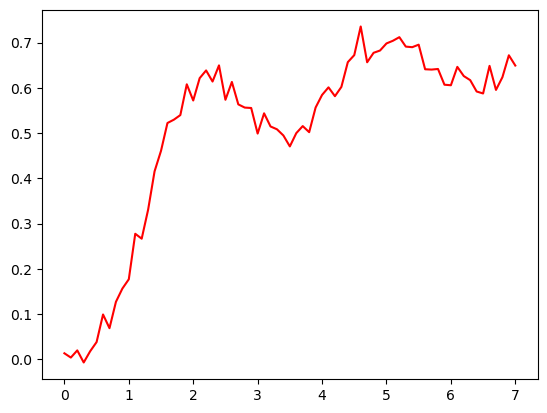

In [11]:
datos = pd.read_csv ('data\exercise_05.csv')
#sns.scatterplot(datos,t ='t',yn = 'yn')
plt.plot(datos.x,datos.y, color = "red")

N = np.size(datos.x)

#var = 1/datos.y.var();
#_var = var**0.5

## matriz de pesos unitaria vuelve el algoritmo como OLS
_W = np.eye(N) 


In [4]:
### Definiendo Regresor según SU Hipótesis (qué tipo de función propone)
### INCLUYENDO NO LINEALIDADES EN EL REGRESOR

#phi = np.array([np.cos(datos.x), datos.x, np.ones(N)]).transpose()
#phi = np.array([datos.x,np.ones(N)]).transpose()
phi = np.array([datos.x**3,datos.x**2, datos.x, np.ones(N)]).transpose()

## Normalizando Yn y el regresor phi
_y = np.dot(_W,datos.y)
_phi = np.dot(_W,phi)

A = np.dot(_phi.transpose(),_phi)
Mpr = np.linalg.inv(A)


In [5]:
#Obteniendo la matriz de parametros estimadors
B = np.dot(_phi.transpose(),_y)
theta = np.dot(Mpr,B)
theta

array([ 0.00589475, -0.08915344,  0.44253081, -0.09136338])

$y_e = 0.0059t^3-0.089t^2+0.4425t - 0.09163$

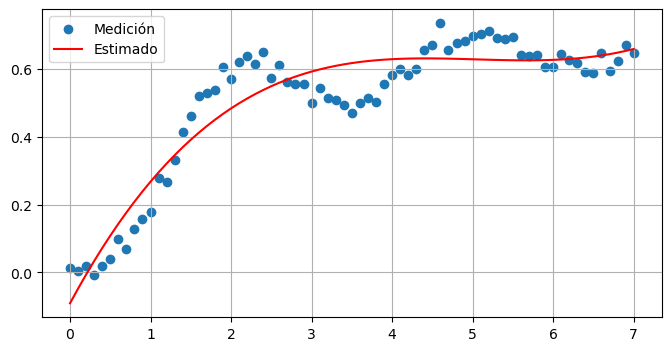

In [10]:
#y_e = np.dot(_phi,theta);

y_e = np.polyval(theta,datos.x)

## Graficando Las 2 funciones

plt.figure(figsize=(8,4))
plt.scatter(datos.x,datos.y)
plt.plot(datos.x,y_e, color = "red")

plt.legend(["Medición","Estimado"])
plt.grid()

In [7]:
## Calculando ECM y R^2

e = datos.y - y_e
ECM = np.dot(e.transpose(),e)/N
R2 = 1 - (np.dot(e.transpose(),e))/(np.dot(datos.y.transpose(),datos.y))
ECM, R2